# Sentiment analysis

In [84]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [85]:
# installing the spacy

!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [86]:
# downloading the punkt package

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
#loading the dataset

tweet= pd.read_csv("C:\\Users\\91770\\Downloads\\Elon_musk.csv",encoding='cp1252',error_bad_lines=False)
tweet

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [88]:
#removing the white spaces

txt = [i.strip() for i in tweet.Text]

In [89]:
txt= [x for x in txt if txt]

In [90]:
# joining the documents into a single string

string=" ".join(txt)

In [91]:
string

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [96]:
import re

text= re.sub("[^A-Za-z," "]+"," ", string).lower()
text= re.sub("[0-9, " "]+"," ", text)

In [97]:
text

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any cr

In [59]:
nltk.download("stopwords")
stpwrd= stopwords.words("english")
stpwrd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
words = text.split(" ")

In [61]:
words

['',
 'kunalb',
 'i',
 'm',
 'an',
 'alien',
 'id',
 'aa',
 'carmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'next',
 'level',
 'have',
 'you',
 'tried',
 'it',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera',
 'doge',
 'is',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'https',
 't',
 'co',
 'wfkmyu',
 'oj',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'https',
 't',
 'co',
 'zgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'givedirectly',
 'just',
 

In [62]:
word = [w for w in words if w not in stpwrd]

In [63]:
word= " ".join(word)

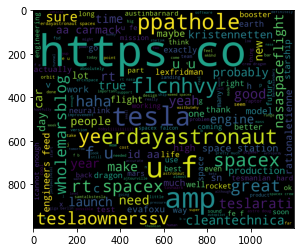

In [64]:
wrdcld= WordCloud(
    background_color= "black",
    width = 1200,
    height= 1000).generate(word)

plt.imshow(wrdcld)

In [98]:
word= word.split(" ")

In [99]:
stp= ["https","co","u","f","ye","amp","ppathole","teslaownerssv","spacex","erdayastronaut","teslarati"]

In [100]:
stop= stpwrd+stp

In [101]:
word =[ w for w in word if w not in stop]


In [102]:
word= " ".join(word)

In [103]:
word

' kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations china amazing execution last year next even happy new year ox wfkmyu oj frodo underdoge thought would fail zgxjfdzzrm owensparks anonyx haha thanks anonyx indeed tweets definitely represent real world time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest rwe uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha fc uhqsd freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission pwt ajtourville yes blkmdl rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink stagge

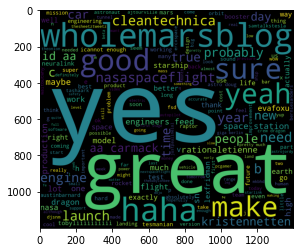

In [104]:
wrdcld= WordCloud(
    background_color= "black",
    width= 1400,
    height= 1200).generate(word)
plt.imshow(wrdcld)

In [105]:
#importing the natural language tool kit(nlyk)

import nltk

In [106]:
#downloading the punkt package

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
# from nltk importing the tokenize function for tokenizing the data

from nltk import tokenize

In [108]:
sentence= tokenize.sent_tokenize(string)

In [109]:
#forming the dataframe for the formed sentences after tokenizing

dataframe= pd.DataFrame(sentence,columns=['sentence'])

In [110]:
dataframe.head(40)

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...


In [111]:
# uploading the affinity lexicons used for sentiment analysis

afinn= pd.read_csv("C:\\Users\\91770\\Downloads\\archive (2)\\Afinn.csv",encoding='cp1252')

In [112]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [113]:
#convering them into dictionary

affinity_score=afinn.set_index('word')['value'].to_dict()

In [114]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [115]:
#installing the spacy package

! python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [116]:
#importing the spacy package

import en_core_web_sm

In [117]:
nlp = en_core_web_sm.load()

In [118]:
affinity_lexicons= affinity_score

In [119]:
#Defining a function to perform the sentiment analysis on the given data

def sentiment_analysis(text: str=None):
    sent_score=0
    
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += affinity_lexicons.get(word.lemma_,0)
            
    return sent_score

In [120]:
#applying the defined funtion to the dataframe formed after assigning the lexicon values

dataframe['sentence_value']= dataframe['sentence'].apply(sentiment_analysis)

In [121]:
dataframe

,sentence,sentence_value
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can’t b… ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [122]:
# finding the word count in every document in the corpus

dataframe['word count']=dataframe['sentence'].str.split().apply(len)

In [123]:
dataframe

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [124]:
#sorting the dataframe by the the sentence values assigned to it
                                   
dataframe.sort_values(by='sentence_value').head(50)

,sentence,sentence_value,word count
640,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
828,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
473,"He plays the “poor inventor” card, but was ric...",-5,34
910,"It may never pay out, as the stock can’t b… ht...",-4,31
672,"Occasional flights from land are ok, but frequ...",-4,39
604,"Then static fire, checkouts, static fire, fly ...",-4,12
283,@trylolli @Maisie_Williams <U+0001F47B> <U+000...,-3,11
23,https://t.co/UEEocOfcTb The people have spoken...,-3,38
291,"No symptoms for past few days, apart from fati...",-3,9


In [125]:
dataframe[dataframe['sentence_value']<=0]

,sentence,sentence_value,word count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [126]:
dataframe[dataframe['sentence_value']>10]

,sentence,sentence_value,word count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,85
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
157,@harsimranbansal @heydave7 It will most likely...,11,93
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",12,99
222,"@PPathole @karpathy For a second there, I thou...",11,69
255,@TheOnion @ID_AA_Carmack Yup @flcnhvy Change o...,11,64
562,@WholeMarsBlog Haha true @oneandonlyheady Mayb...,11,69
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138


C:\Users\91770\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

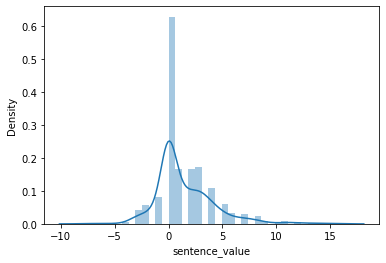

In [127]:
# plotting the dist plot

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataframe['sentence_value'])

In [128]:
dataframe['index']= dataframe.index

<AxesSubplot:xlabel='index', ylabel='sentence_value'>

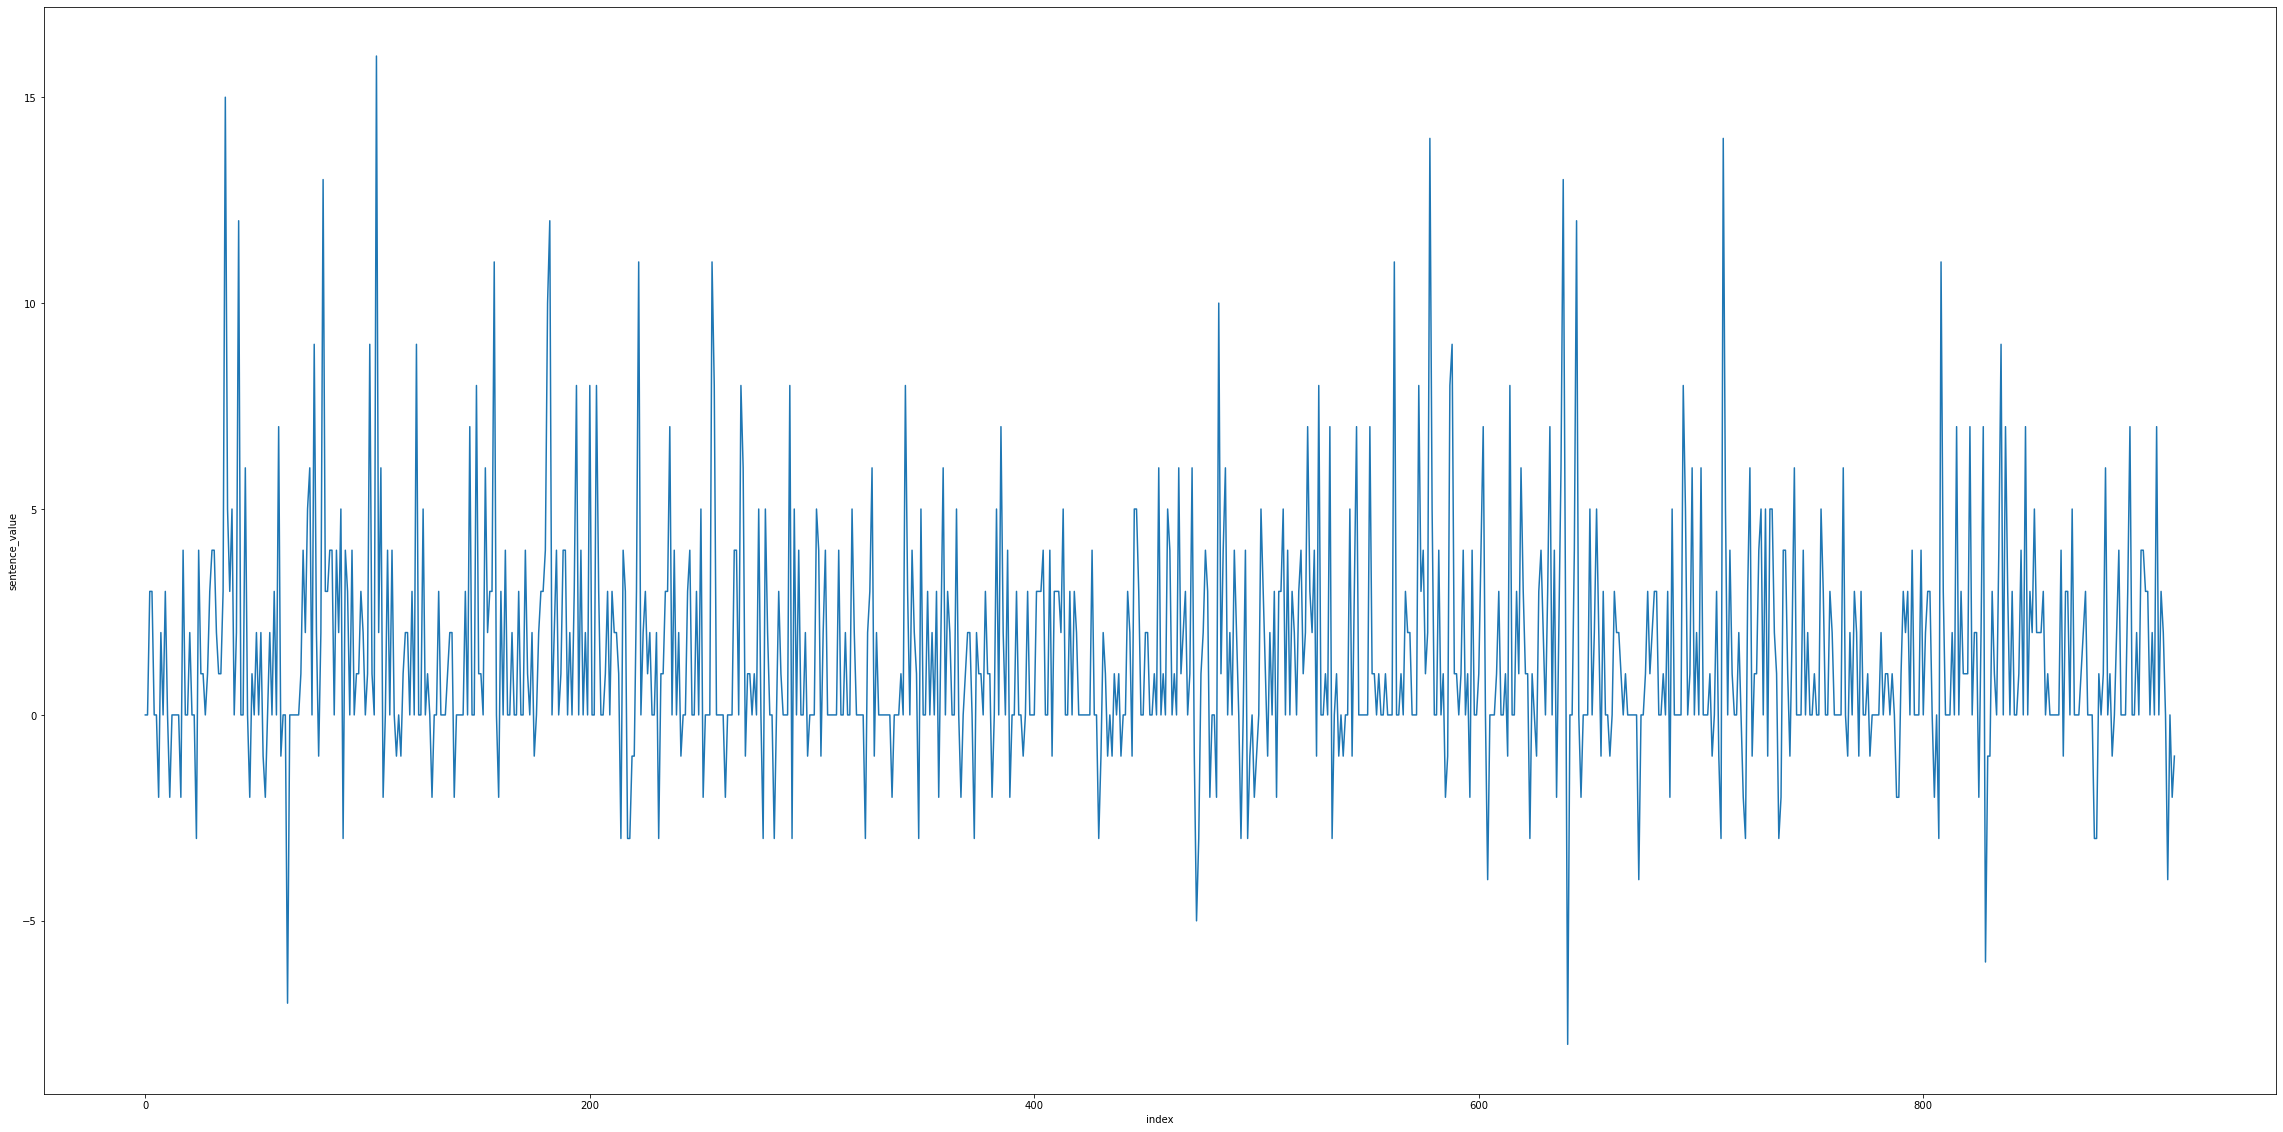

In [129]:
#plotting the line plot

plt.figure(figsize=[40,20])
sns.lineplot(y='sentence_value', x='index', data= dataframe)

<AxesSubplot:title={'center':'sentiment analysis of the elon musk tweets'}, xlabel='word count', ylabel='sentence_value'>

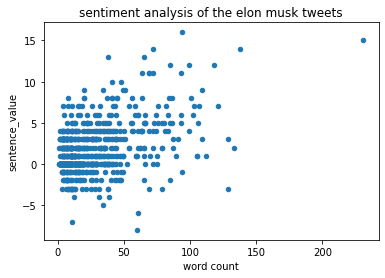

In [130]:
#plotting a scatter plot

dataframe.plot.scatter(y='sentence_value', x= 'word count',title='sentiment analysis of the elon musk tweets')